## Author - Projapoti Roy
**Task 2 - Prediction using Unsupervised ML (Level - Beginner)**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
#load the dataset
iris = datasets.load_iris()  #dataset link - https://bit.ly/3kXTdox
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
#first 5 rows of dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df.shape

(150, 4)

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
#Generate descriptive statistics
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X = iris_df.iloc[:, [0,1,2,3]].values

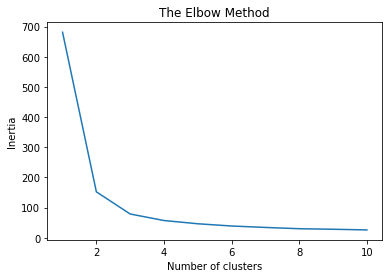

In [9]:
#Within cluster sum of squares
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plot the elbow curve to find Optimum Number of clusters for k-means algorithm
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
#From the elbow curve, we can see that optinum number of clusters is 3, 
#the wcss values didn't decrease significantly after that.
no_of_clusters = 3

In [11]:
#Creating K-Means clustering model 
kmeans = KMeans(n_clusters = no_of_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
pred = kmeans.predict(X)

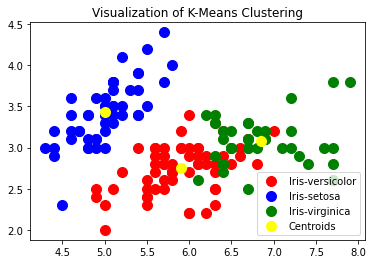

In [12]:
#Visualization of clustering
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Iris-versicolor')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
            
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Visualization of K-Means Clustering')
plt.legend()

**Conclusion**
1. Using the elbow method, we can see that the optinum number of clusters is 3, because the wcss values didn't decrease significantly after that.